In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import xarray as xr

# UK CEH land cover - Great Britain

The UK Centre for Ecology and Hydrology Land Cover maps https://www.ceh.ac.uk/data/ukceh-land-cover-maps use satellite image to create a contiguous land use map of the UK classifiying land into 21 target categories:

1. Broadleaved woodland
2. Coniferous woodland
3. Arable
4. Improved grassland
5. Neutral grassland
6. Calcareous grassland
7. Acid grassland
8. Fen, Marsh and Swamp
9. Heather and shrub
10. Heather grassland
11. Bog
12. Inland rock
13. Saltwater
14. Freshwater
15. Supralittoral rock
16. Supralittoral sediment
17. Littoral rock
18. Littoral sediment
19. Saltmarsh
20. Urban
21. Suburban

Additionally, 10 aggregate categories are defined

1. Broadleaf woodland
2. Coniferous woodland
3. Arable
4. Improved grassland
5. Semi-natural grassland
6. Mountain, heath and bog
7. Saltwater
8. Freshwater
9. Coastal
10. Built-up areas and gardens


1000m rasterised data can be downloaded from https://catalogue.ceh.ac.uk/documents/a3ff9411-3a7a-47e1-9b3e-79f21648237d.
The dataset contains 2 sets of 4 separate files. Including dominant class and class percentages for each set of classes, and for Great Britain and Norther Ireland in separate files.

In this notebook with plot the different Great Britain datasets and store them into a NetCDF file for use in the AgriFoodPy package.
We generate three datasets:

1. `UKCEH_LC_dom_1000_gb` : dominant category per pixel, with one dataarray per category group
2. `UKCEH_LC_per_tar_1000_gb` : caterogy percentage per pixel for the "Target" category group
3. `UKCEH_LC_per_agg_1000_gb` : caterogy percentage per pixel for the "Aggregate" category group

In [2]:
aggregate_names=[
    "Broadleaf woodland",
    "Coniferous woodland",
    "Arable",
    "Improved grassland",
    "Semi-natural grassland",
    "Mountain, heath and bog",
    "Saltwater",
    "Freshwater",
    "Coastal",
    "Built-up areas and gardens"
]

target_names=[
    "Broadleaved woodland",
    "Coniferous woodland",
    "Arable",
    "Improved grassland",
    "Neutral grassland",
    "Calcareous grassland",
    "Acid grassland",
    "Fen, Marsh and Swamp",
    "Heather and shrub",
    "Heather grassland",
    "Bog",
    "Inland rock",
    "Saltwater",
    "Freshwater",
    "Supralittoral rock",
    "Supralittoral sediment",
    "Littoral rock",
    "Littoral sediment",
    "Saltmarsh",
    "Urban",
    "Suburban"
]

# Dominant dataset

In [3]:
im_dom_agg = gdal.Open("../../data/land/CEH/a3ff9411-3a7a-47e1-9b3e-79f21648237d/data/gb2021lcm1km_dominant_aggregate.tif")
im_dom_tar = gdal.Open("../../data/land/CEH/a3ff9411-3a7a-47e1-9b3e-79f21648237d/data/gb2021lcm1km_dominant_target.tif")


In [4]:
imarray_dom_agg = np.array(im_dom_agg.GetRasterBand(1).ReadAsArray(), dtype=float)
imarray_dom_tar = np.array(im_dom_tar.GetRasterBand(1).ReadAsArray(), dtype=float)

In [5]:
# make a color map of fixed colors
# list of indexes               1,2        3        4,5       6      7,8,9    10
cmap_agg = colors.ListedColormap(['green', 'orange', 'yellow', 'brown', 'blue', 'grey'])
bounds_agg=                    [0,      2.5,      3.5,      5.5,     6.5,    9.5,      11]
norm_agg = colors.BoundaryNorm(bounds_agg, cmap_agg.N)

In [6]:
color_list = ["#ff0000", "#006600", "#732600", "#00ff00", 
"#7fe57f", "#70a800", "#998100", "#ffff00",
"#801a80", "#e68ca6", "#008073", "#d2d2ff",
"#000080", "#0000ff", "#ccb300", "#ccb300",
"#ffff80", "#ffff80", "#8080ff", "#000000",
"#808080"]

cb_color_list = ["#33a02c", "#005000", "#f0e442", "#01ff7c",
"#dc9909", "#ffc037", "#b29100", "#fd7bee",
"#801a80", "#e68ca6", "#cd3bb5", "#d2d2ff",
"#00005c", "#0000ff", "#987db7", "#ccb300",
"#ffff80", "#ffff80", "#8080ff", "#000000",
"#808080"]

# make a color map of fixed colors
cmap_tar = colors.ListedColormap(color_list)
bounds_tar = np.linspace(0.5, 21.5, 22)
norm_tar = colors.BoundaryNorm(bounds_tar, cmap_tar.N)

Text(0.5, 1.0, 'dominant target')

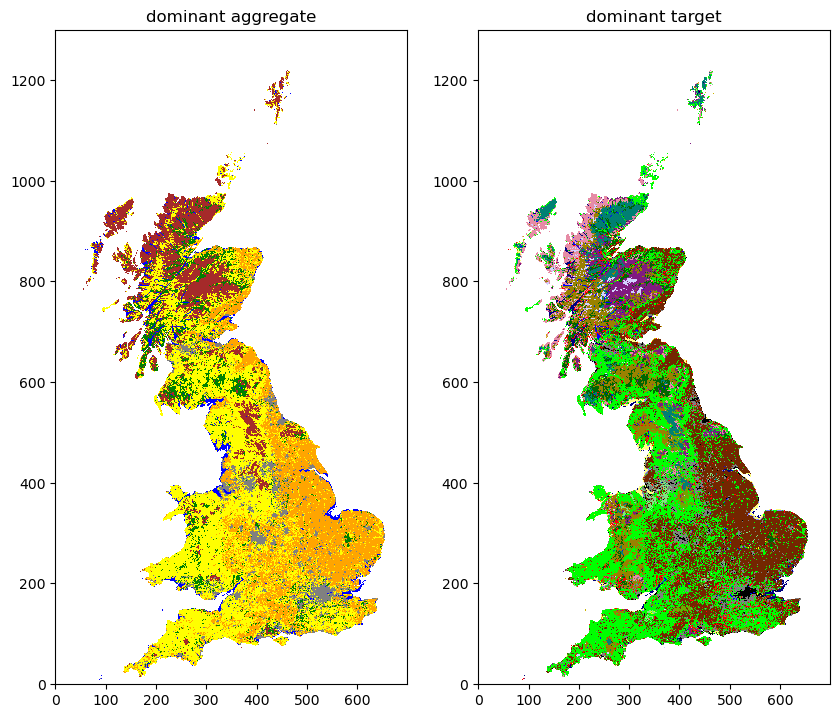

In [7]:
imarray_dom_agg = np.flip(imarray_dom_agg, axis=0)
imarray_dom_tar = np.flip(imarray_dom_tar, axis=0)

nan_mask = np.where(imarray_dom_agg == 0)
imarray_dom_agg[nan_mask] = np.NaN
imarray_dom_tar[nan_mask] = np.NaN

f, axs = plt.subplots(1, 2, figsize=(10,12))
axs[0].imshow(imarray_dom_agg, interpolation="none", cmap=cmap_agg, norm=norm_agg, origin="lower")
axs[0].set_title("dominant aggregate")

axs[1].imshow(imarray_dom_tar, interpolation="none", cmap=cmap_tar, norm=norm_tar, origin="lower")
axs[1].set_title("dominant target")

In [8]:
size = imarray_dom_agg.shape

xpos = np.arange(size[0]+1)*1000
ypos = np.arange(size[1]+1)*1000

xcoords = 0.5*(ypos[1:] + ypos[:-1])
ycoords = 0.5*(xpos[1:] + xpos[:-1])

# Percentage dataset

In [9]:
im_per_agg = gdal.Open("../../data/land/CEH/a3ff9411-3a7a-47e1-9b3e-79f21648237d/data/gb2021lcm1km_percentage_aggregate.tif")
im_per_tar = gdal.Open("../../data/land/CEH/a3ff9411-3a7a-47e1-9b3e-79f21648237d/data/gb2021lcm1km_percentage_target.tif")


In [10]:
imarray_per_agg = np.flip(np.array(im_per_agg.ReadAsArray(), dtype=float), axis=1)
imarray_per_tar = np.flip(np.array(im_per_tar.ReadAsArray(), dtype=float), axis=1)

for i in range(10):
    imarray_per_agg[i][nan_mask] = np.NaN

for i in range(21):
    imarray_per_tar[i][nan_mask] = np.NaN


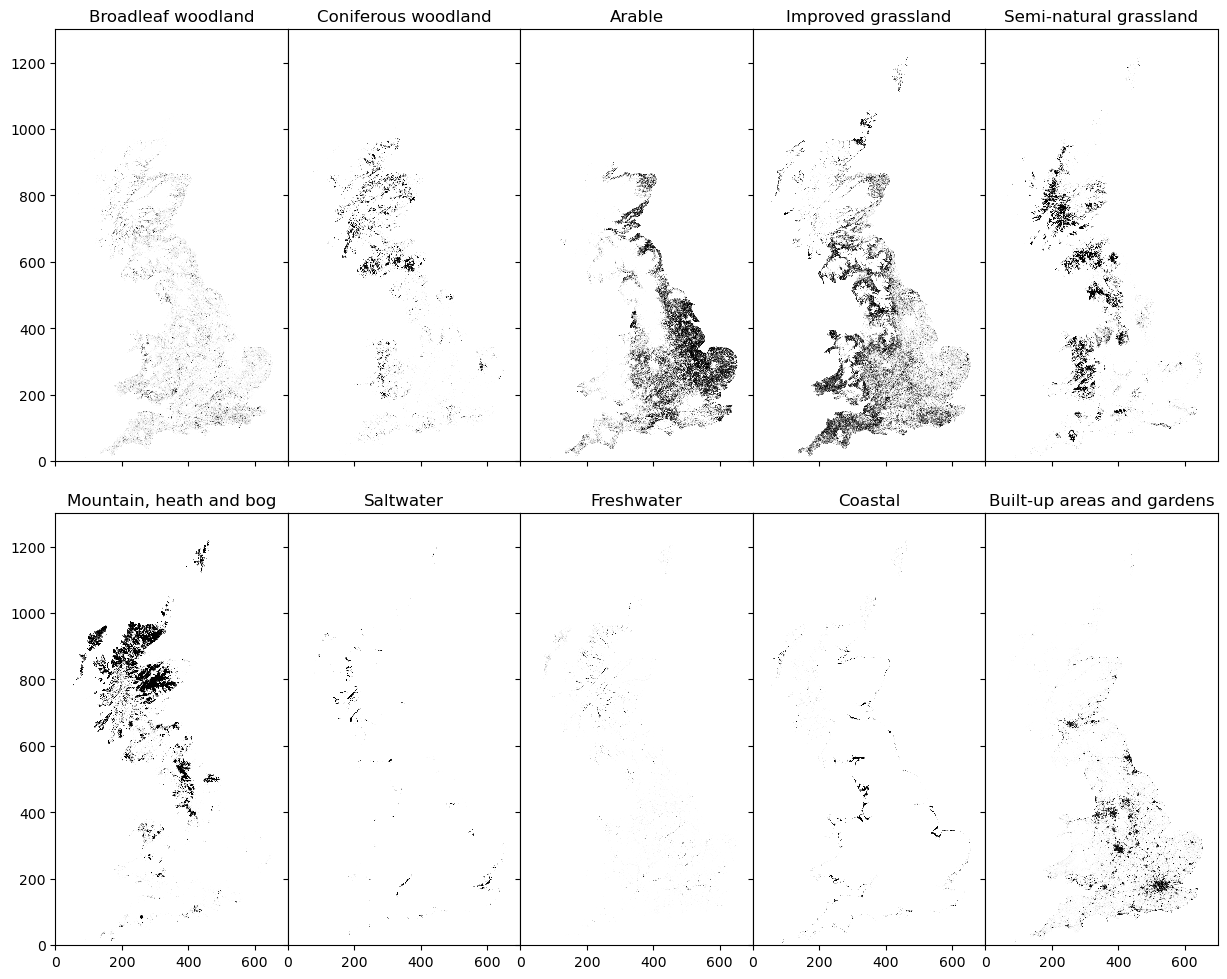

In [11]:
# plt.figure(figsize=(10,12))
f, axs = plt.subplots(2, 5, figsize=(15,12), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0)

for i, ax in enumerate(np.ravel(axs)):
    ax.imshow(imarray_per_agg[i], interpolation="none", cmap="Greys", origin="lower")
    ax.set_title(aggregate_names[i])

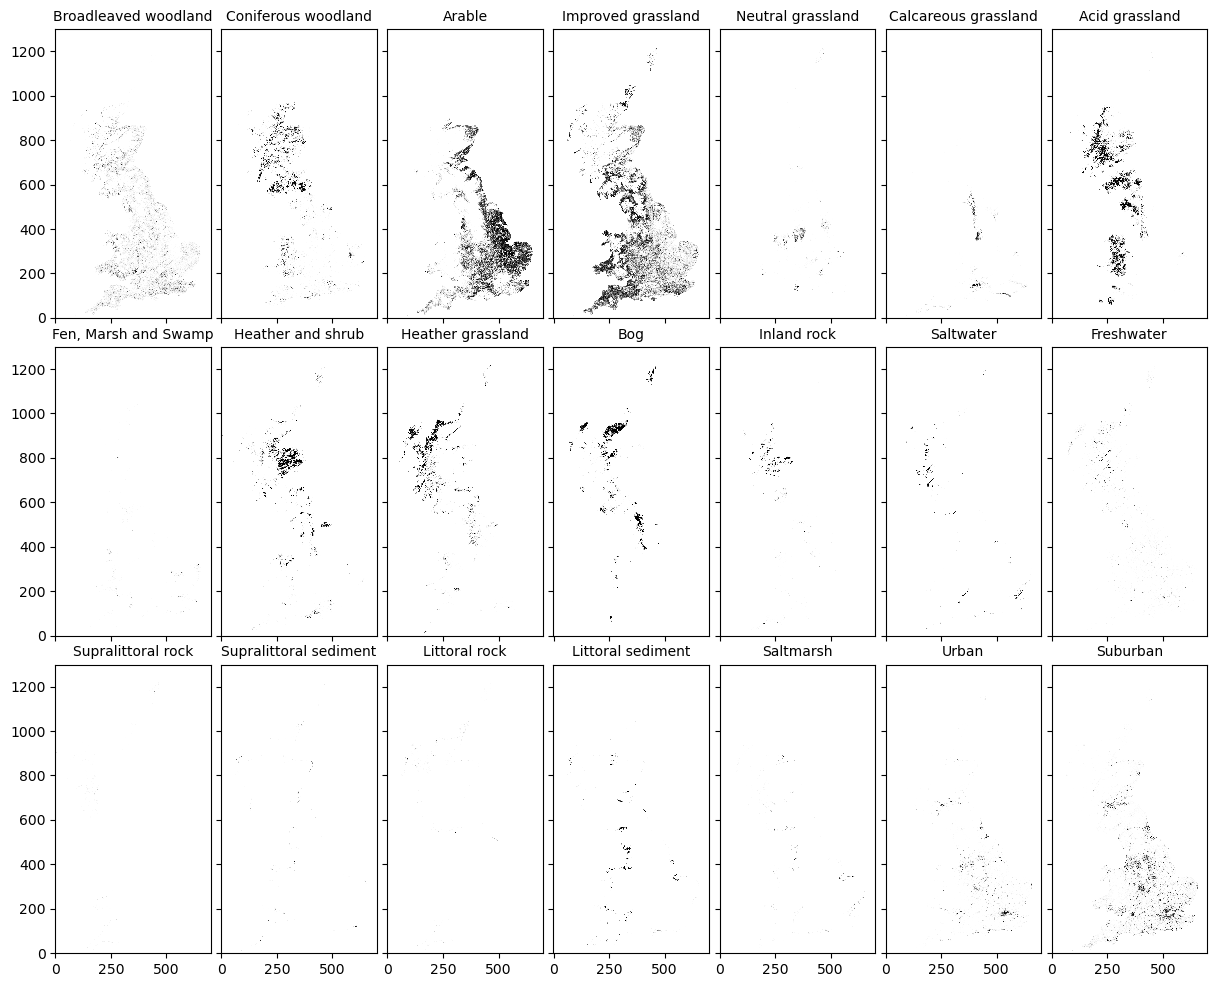

In [12]:
# plt.figure(figsize=(10,12))
f, axs = plt.subplots(3, 7, figsize=(15,12), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0)

for i, ax in enumerate(np.ravel(axs)):
    ax.imshow(imarray_per_tar[i], interpolation="none", cmap="Greys", origin="lower")
    ax.set_title(target_names[i], size=10)

In [13]:
# Create xaarray dataset

data = xr.Dataset(
    data_vars = dict(
        dominant_target=(["y", "x"], imarray_dom_tar),
        dominant_aggregate=(["y", "x"], imarray_dom_agg),
        percentage_target=(["target_class", "y", "x"], imarray_per_tar),
        percentage_aggregate=(["aggregate_class", "y", "x"], imarray_per_agg),
    ),
    coords = dict(
        y=("y", ycoords),
        x=("x", xcoords),
        target_class=("target_class", target_names),
        aggregate_class=("aggregate_class", aggregate_names)
    )
)
data

<xarray.Dataset>
Dimensions:               (y: 1300, x: 700, target_class: 21,
                           aggregate_class: 10)
Coordinates:
  * y                     (y) float64 500.0 1.5e+03 ... 1.298e+06 1.3e+06
  * x                     (x) float64 500.0 1.5e+03 ... 6.985e+05 6.995e+05
  * target_class          (target_class) <U22 'Broadleaved woodland' ... 'Sub...
  * aggregate_class       (aggregate_class) <U26 'Broadleaf woodland' ... 'Bu...
Data variables:
    dominant_target       (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    dominant_aggregate    (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    percentage_target     (target_class, y, x) float64 nan nan nan ... nan nan
    percentage_aggregate  (aggregate_class, y, x) float64 nan nan ... nan nan

In [14]:
encoding = {"dominant_target":{"dtype":"float32", "zlib": True, "complevel": 5},
            "dominant_aggregate":{"dtype":"float32", "zlib": True, "complevel": 5},
            "percentage_target":{"dtype":"float32", "zlib": True, "complevel": 5},
            "percentage_aggregate":{"dtype":"float32", "zlib": True, "complevel": 5}}

data.to_netcdf(f"../data/UKCEH_LC_1000_gb.nc", encoding=encoding)